# PREDICT OUTBREAK PERIOD AND LOW CASES PERIOD

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error

In [3]:
# read in pickle
df_iq = pd.read_pickle('./df_iq.pkl')
df_sj = pd.read_pickle('./df_sj.pkl')

# create month variable
df_sj['month'] = df_sj.index.month
df_iq['month'] = df_iq.index.month

# train test split
#sj
sj_train = df_sj.loc[:'2003-04-20']
sj_Xtrain = sj_train.drop('total_cases', axis = 1)
sj_ytrain = sj_train[['total_cases']]

sj_test = df_sj.loc['2003-04-20':]
sj_Xtest = sj_test.drop('total_cases', axis = 1)
sj_ytest = sj_test[['total_cases']]

#iq
iq_train = df_iq.loc[:'2009-06-20']
iq_Xtrain = iq_train.drop('total_cases', axis = 1)
iq_ytrain = iq_train[['total_cases']]

iq_test = df_iq.loc['2009-06-20':]
iq_Xtest = iq_test.drop('total_cases', axis = 1)
iq_ytest = iq_test[['total_cases']]

In [80]:
# Set up test data to fit into model

# read in test data
test = pd.read_csv('./datasets/dengue_features_test.csv', parse_dates=[3])
submission_format = pd.read_csv('./datasets/submission_format.csv')

#split into cities df
test_sj = test[test['city'] == 'sj']
test_iq = test[test['city'] == 'iq']

# FrontFill to Impute into Missing values
test_sj = test_sj.fillna(method = 'ffill')
test_iq = test_iq.fillna(method = 'ffill')

# set index to the dates
test_sj.set_index('week_start_date', drop = True, inplace = True)
test_iq.set_index('week_start_date', drop = True, inplace = True)

# drop non-numerical values
test_sj.drop(['city', 'year', 'weekofyear'], axis = 1, inplace = True)
test_iq.drop(['city', 'year', 'weekofyear'], axis = 1, inplace = True)

# create month variable
test_sj['month'] = test_sj.index.month
test_iq['month'] = test_iq.index.month

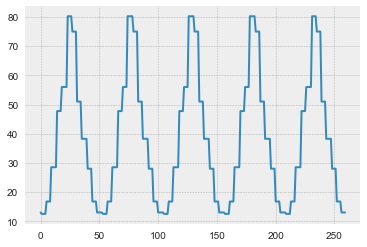

In [81]:
# sj month by month only
lr = LinearRegression()
month_dums = pd.get_dummies(sj_Xtrain['month'], prefix = 'month')
X = month_dums
y = sj_ytrain.values
lr.fit(X, y)
# sj_predicts = lr.predict(X)
# plt.plot(sj_predicts)
# plt.plot(y)
# print mean_absolute_error(sj_predicts, y)

#predict test values
Xtest = pd.get_dummies(test_sj['month'], prefix='month')
sj_predicts_test = lr.predict(Xtest)
plt.plot(sj_predicts_test)

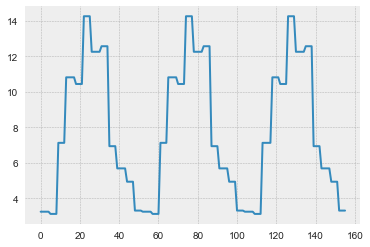

In [99]:
# iq month by month only
lr = LinearRegression()
month_dums = pd.get_dummies(iq_Xtrain['month'], prefix = 'month')
X = month_dums
y = iq_ytrain.values
lr.fit(X, y)
# iq_predicts = lr.predict(X)
# plt.plot(iq_predicts)
# plt.plot(y)
# print mean_absolute_error(iq_predicts, y)

#predict test values
Xtest = pd.get_dummies(test_iq['month'], prefix='month')
iq_predicts_test = lr.predict(Xtest)
plt.plot(iq_predicts_test)

In [100]:
# submission
submission_format = pd.read_csv('./datasets/submission_format.csv')

In [101]:
sj_predicts_test2 = []
for i in sj_predicts_test:
    for j in i:
        sj_predicts_test2.append(j)
iq_predicts_test2 = []
for i in iq_predicts_test:
    for j in i:
        iq_predicts_test2.append(j)

In [102]:
sj_predicts_test2.extend(iq_predicts_test2)
total_preds = sj_predicts_test2

In [103]:
print len(total_preds)
print len(submission_format['total_cases'])

# monthly_preds = sj_predicts.append(iq_predicts).reset_index(drop = True)

416
416


In [105]:
submission_format['total_cases'] = total_preds
submission_format['total_cases'] = submission_format['total_cases'].apply(lambda x: int(x))

In [107]:
# Save to CSV, use current date
submission_format.to_csv('submissions/dengue_submission_9_10_17v2.csv', index=False)